In [ ]:
#Importamos las librerías de costumbre
import numpy as np
import pandas as pd
#Instalamos la librería que nos va a permitir bajar de drive
!pip install gdown
import gdown
#Colocamos la URL del archivo
url = 'https://drive.google.com/uc?id=16OaCBYnHF-OMe784Trvpi-DQoEMFyBLZ'
#Colocamos el nombre al archivo donde la información será guardada
Nombre = 'TipoVehiculo.rar'
#Lo descargamos
gdown.download(url,Nombre,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1tY5Nkrr7mEvkXjrlWPHyzx9DoDZhSD2l
To: /content/Vehiculos.rar
44.3MB [00:00, 112MB/s] 


'Vehiculos.rar'

In [ ]:
#Una vez descargado lo extraemos, para eso hacemos uso de las librerías patool y pyunpack
!pip install patool pyunpack
from pyunpack import Archive

#Extraemos
Archive('TipoVehiculo.rar').extractall('.')
print("Extraído satisfactoriamente")

Extraído satisfactoriamente


In [1]:
#Importamos tensorflow y Keras, primero instalamos tensorflow-gpu en caso de que no esté
import tensorflow as tf
from tensorflow import keras

In [2]:
#Ahora crearemos los train generator para cada clase
#Ahora normalizamos los canales de RGB de entrenamiento
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.3)

#Creamos el generador de imágenes de entrenamiento cuyo tamaño será de 200x200 y estará en batches de 32 con 2 clases
train_generator = train_datagen.flow_from_directory(
    directory='../Datasets/TipoVehiculo',
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory='../Datasets/TipoVehiculo', # same directory as training data
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 12284 images belonging to 8 classes.
Found 5258 images belonging to 8 classes.


In [3]:
#Creamos el modelo para entrenarlo repetidas veces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
history = []
best_val_history = []
for i in range(1,101):
    modelo = Sequential()
    modelo.add(Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(MaxPooling2D(pool_size=(2,2)))
    modelo.add(Flatten())
    modelo.add(Dense(8,activation='softmax',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('Tipo/Arquitectura1_LR_0_01/arq1_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss='categorical_crossentropy',metrics=['acc'])
    history.append(modelo.fit(train_generator,epochs=100,callbacks=[mcp_save, es],validation_data=validation_generator))        
    del modelo

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 299s 486ms/step - loss: 1.6462 - acc: 0.4243 - val_loss: 1.5497 - val_acc: 0.4578
Epoch 2/100
615/615 [==============================] - 302s 491ms/step - loss: 1.4463 - acc: 0.4897 - val_loss: 1.4454 - val_acc: 0.4968
Epoch 3/100
615/615 [==============================] - 302s 491ms/step - loss: 1.3556 - acc: 0.5292 - val_loss: 1.3451 - val_acc: 0.5264
Epoch 4/100
615/615 [==============================] - 300s 487ms/step - loss: 1.2628 - acc: 0.5570 - val_loss: 1.3429 - val_acc: 0.5297
Epoch 5/100
615/615 [==============================] - 302s 491ms/step - loss: 1.1886 - acc: 0.5863 - val_loss: 1.3029 - val_acc: 0.5479
Epoch 6/100
615/615 [==============================] - 811s 1s/step - loss: 1.1169 - acc: 0.6129 - val_loss: 1.2978 - val_acc: 0.5531
Epoch 7/100
615/615 [==============================] - 952s 2s/step - loss: 1.0517 - ac

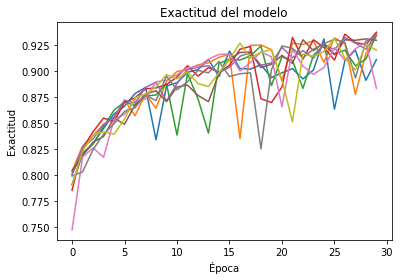

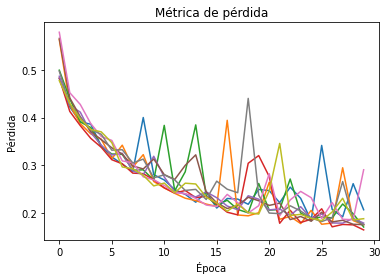

In [ ]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
best_val_history = []
for i in range(1,101):
    modelo = load_model('V_NoV/Arquitectura6_LR_0_0001/arq6_'+str(i)+'.hdf5')
    best_val_history.append(modelo.evaluate(validation_generator))
    del modelo

In [ ]:
prom_loss = 0.0;
prom_acc = 0.0;
for i in range(len(best_val_history)):
    prom_loss = prom_loss + best_val_history[i][0]
    prom_acc = prom_acc + best_val_history[i][1]

prom_loss = prom_loss / len(best_val_history)
prom_acc = prom_acc / len(best_val_history)

print(prom_loss)
print(prom_acc)

In [5]:
#Para liberar la memoria del GPU
from numba import cuda
cuda.select_device(0)
cuda.close()